#### **Ibrahim Johar Farooqi**
#### **23K-0074**
#### **ML - Lab 06 - Tasks**

##### **task 01**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
cols = ['ID', 'Diagnosis'] + [f'{f}_{t}' for t in ['mean', 'se', 'worst'] for f in ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']]
df = pd.read_csv('wdbc.data', header=None, names=cols)

In [8]:
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.columns

Index(['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal dimension_worst'],
      dtype='object')

In [ ]:
df['Diagnosis'] = df['Diagnosis'].map({'M':1, 'B':0})  #M=1(malignant), B=0(benign)

In [3]:
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
#performing EDA
print('describe:\n', df.describe())
print('balance:\n', df['Diagnosis'].value_counts(normalize=True))
print('nulls:', df.isnull().sum().sum())
print('shape:', df.shape)

describe:
                  ID   Diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.0797

In [11]:
#count num of missing vals
df.isna().sum()

ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal dimension_worst    0
dtype: int64

In [12]:
df.dtypes

ID                           int64
Diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [13]:
for c in df.columns:
    print(f"{c} --- dtype = {df[c].dtype} --- n.unique = {df[c].nunique()}")

ID --- dtype = int64 --- n.unique = 569
Diagnosis --- dtype = object --- n.unique = 2
radius_mean --- dtype = float64 --- n.unique = 456
texture_mean --- dtype = float64 --- n.unique = 479
perimeter_mean --- dtype = float64 --- n.unique = 522
area_mean --- dtype = float64 --- n.unique = 539
smoothness_mean --- dtype = float64 --- n.unique = 474
compactness_mean --- dtype = float64 --- n.unique = 537
concavity_mean --- dtype = float64 --- n.unique = 537
concave points_mean --- dtype = float64 --- n.unique = 542
symmetry_mean --- dtype = float64 --- n.unique = 432
fractal dimension_mean --- dtype = float64 --- n.unique = 499
radius_se --- dtype = float64 --- n.unique = 540
texture_se --- dtype = float64 --- n.unique = 519
perimeter_se --- dtype = float64 --- n.unique = 533
area_se --- dtype = float64 --- n.unique = 528
smoothness_se --- dtype = float64 --- n.unique = 547
compactness_se --- dtype = float64 --- n.unique = 541
concavity_se --- dtype = float64 --- n.unique = 533
concave poin

In [14]:
categorical = df.select_dtypes(include=['object', 'category'])
continuous = df.select_dtypes(include=['int64', 'float64'])

print(f"categorical cols:\n{categorical.columns.tolist()}")
print(f"continuous cols:\n{continuous.columns.tolist()}")

categorical cols:
['Diagnosis']
continuous cols:
['ID', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal dimension_worst']


In [15]:
#checking how many duplicates exist
duplicates = df.duplicated().sum()

print(f"num of duplicated rows: {duplicates}")

num of duplicated rows: 0


In [16]:
if duplicates > 0:
    df = df.drop_duplicates()
    print("duplicate rows have been dropped.")
    
duplicates = df.duplicated().sum()    
print(f"num of duplicate rows after dropping duplicates: {duplicates}")

num of duplicate rows after dropping duplicates: 0


In [17]:
df.shape

(569, 32)

In [19]:
df['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [22]:
df = df.drop(columns=['ID'])

In [23]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape, y.shape

((569, 30), (569,))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, stratify=y, random_state=42)

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', probability=True, random_state=42)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [28]:
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    gmean = (sensitivity * specificity) ** 0.5
    fdr = fp / (fp + tp) 
    forate = fn / (fn + tn) 
    mcc = ((tp * tn) - (fp * fn)) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    return {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'G-Mean': gmean,
        'FDR': fdr,
        'FOR': forate,
        'MCC': mcc
    }

In [29]:
metrics_knn = calculate_metrics(y_test, y_pred_knn)
metrics_svm = calculate_metrics(y_test, y_pred_svm)

metrics_results = pd.DataFrame([metrics_knn, metrics_svm], index=['KNN', 'SVM']).T

print("metrics results:")
print(metrics_results)

metrics results:
                  KNN       SVM
Accuracy     0.964912  0.982456
Sensitivity  0.952381  0.952381
Specificity  0.972222  1.000000
G-Mean       0.962250  0.975900
FDR          0.047619  0.000000
FOR          0.027778  0.027027
MCC          0.924603  0.962622


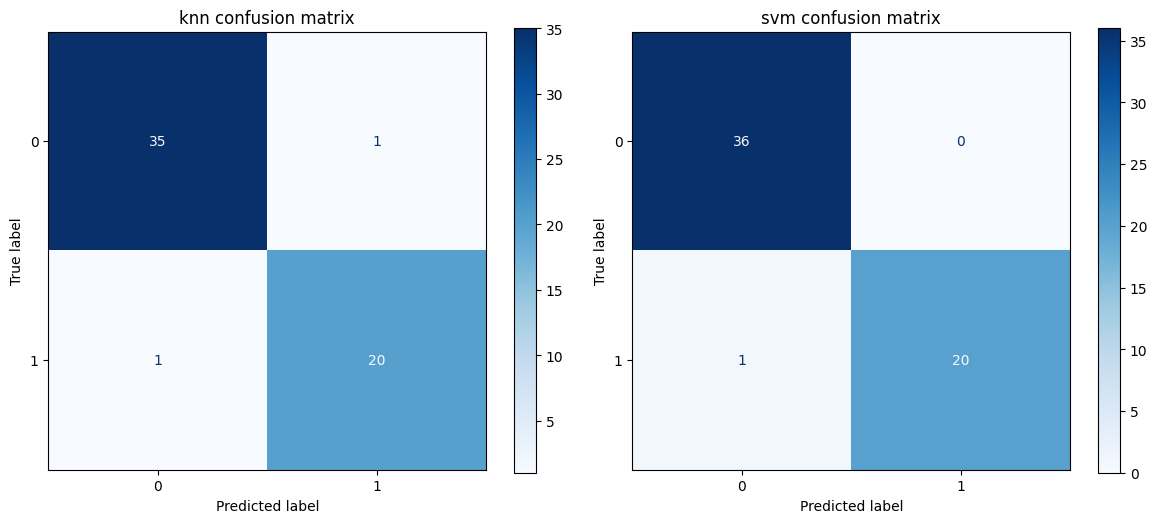

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap=plt.cm.Blues, ax=axes[0], values_format='d')
axes[0].set_title('knn confusion matrix')


cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap=plt.cm.Blues, ax=axes[1], values_format='d')
axes[1].set_title('svm confusion matrix')

plt.tight_layout()
plt.show()

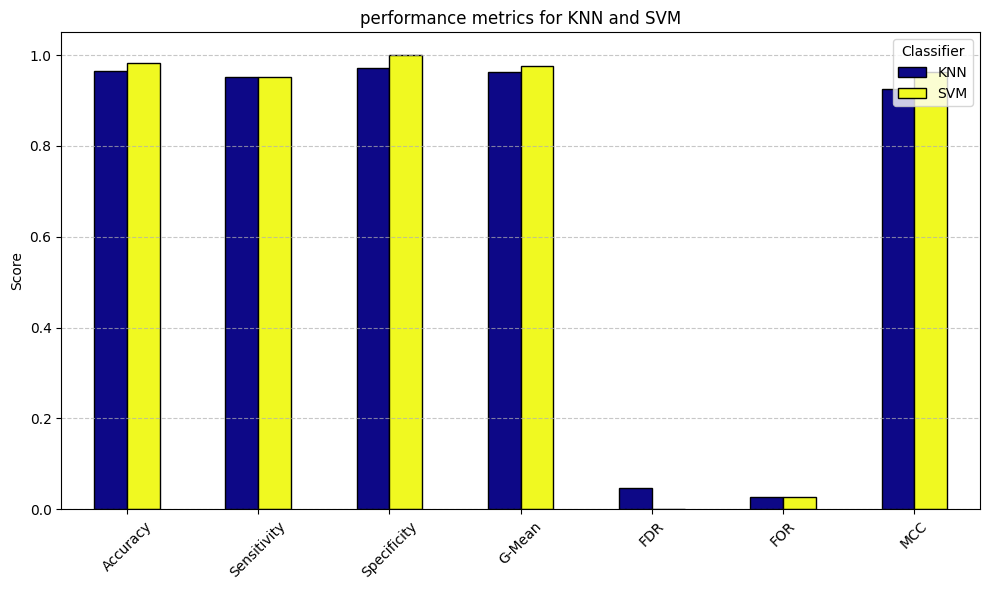

In [36]:
metrics_results.plot(kind='bar', figsize=(10, 6), colormap='plasma', edgecolor='black')
plt.title('performance metrics for KNN and SVM')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Classifier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **task 02**

In [39]:
import numpy as np

def calculate_f_scores(X, y):
    f_scores = []
    
    for i in range(X.shape[1]):
        feature = X[:, i]
        
        pos = feature[y == 1]
        neg = feature[y == 0]

        if len(pos) == 0 or len(neg) == 0:
            f_scores.append(0)
            continue
        
        mean_pos = np.mean(pos)
        mean_neg = np.mean(neg)
        mean_total = np.mean(feature)

        numerator = (mean_pos - mean_total) ** 2 + (mean_neg - mean_total) ** 2

        denom_pos = np.var(pos)
        denom_neg = np.var(neg)

        denominator = (denom_pos / len(pos)) + (denom_neg / len(neg))

        if denominator == 0:
            f_scores.append(0)
        else:
            f_scores.append(numerator / denominator)
        
    return np.array(f_scores)


In [40]:
f_scores = calculate_f_scores(X_scaled, y)
features_sorted = np.argsort(f_scores)[::-1]

feature_subsets = [features_sorted[:i] for i in range(1, 10)]

In [46]:
from sklearn.metrics import accuracy_score, recall_score

def evaluate_svm(X_train, X_test, y_train, y_test, features):
    #train SVM
    model = SVC(kernel='linear', probability=False)

    X_train_sub = X_train[:, features]
    X_test_sub = X_test[:, features]

    model.fit(X_train_sub, y_train)
    y_pred = model.predict(X_test_sub)

    #accuracy
    accuracy = accuracy_score(y_test, y_pred)

    #sensitivity (Recall) - positive class = 'M'
    sensitivity = recall_score(y_test, y_pred, pos_label='M')

    #confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    #specificity = TN / (TN + FP)
    #avoid division by zero
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    return accuracy, sensitivity, specificity, cm

In [ ]:
def evaluate(X, y, splits, feature_subsets):
    results = []
    for split_name, test_size in splits.items():
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

        for i, features in enumerate(feature_subsets):
            accuracy, sensitivity, specificity, cm = evaluate_svm(X_train, X_test, y_train, y_test, features)
            results.append({
                'Split': split_name,
                'Model': f"Model #{i+1}",
                'Features': len(features),
                'Accuracy': accuracy,
                'Sensitivity': sensitivity,
                'Specificity': specificity,
                'Confusion Matrix': cm
            })
    return results

In [47]:
splits = {'50-50': 0.5, '70-30': 0.3, '80-20': 0.2}

results = evaluate(X_scaled, y, splits, feature_subsets)

results_df = pd.DataFrame(results)

table_4 = results_df.pivot_table(index=['Model'], columns='Split', values='Accuracy', aggfunc='mean')
print(f"\nTable 4: {table_4}")


Table 4: Split        50-50     70-30     80-20
Model                                 
Model #1  0.638596  0.678363  0.675439
Model #2  0.719298  0.713450  0.701754
Model #3  0.929825  0.947368  0.938596
Model #4  0.929825  0.941520  0.929825
Model #5  0.929825  0.941520  0.929825
Model #6  0.929825  0.935673  0.929825
Model #7  0.975439  0.964912  0.956140
Model #8  0.971930  0.959064  0.947368
Model #9  0.985965  0.988304  0.991228


In [48]:
model_5_results = results_df[results_df['Model'] == 'Model #5']

print("\nTable 6 and 7:")
for idx, res in model_5_results.iterrows():
    print(f"\n{res['Split']}:")
    print(f"Sensitivity: {res['Sensitivity']}, Specificity: {res['Specificity']}")
    print(f"Confusion Matrix:\n{res['Confusion Matrix']}")


Table 6 and 7:

50-50:
Sensitivity: 0.8773584905660378, Specificity: 0.9608938547486033
Confusion Matrix:
[[172   7]
 [ 13  93]]

70-30:
Sensitivity: 0.875, Specificity: 0.9813084112149533
Confusion Matrix:
[[105   2]
 [  8  56]]

80-20:
Sensitivity: 0.8571428571428571, Specificity: 0.9722222222222222
Confusion Matrix:
[[70  2]
 [ 6 36]]


#### **task 03**

In [49]:
from sklearn.metrics import classification_report

def svm_default(X_train, X_test, y_train, y_test, kernels):
    results = {}
    for kernel in kernels:
        print(f"\nSVM with {kernel} kernel:")
        
        model = SVC(kernel=kernel, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        results[kernel] = {
            'accuracy': accuracy,
            'report': classification_report(y_test, y_pred)
        }
        print(f"Accuracy with {kernel} kernel: {accuracy:.4f}")
    return results

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [50]:
print("\nSVM with default parameters:")
default_results = svm_default(X_train, X_test, y_train, y_test, kernels)


SVM with default parameters:

SVM with linear kernel:
Accuracy with linear kernel: 0.9825

SVM with poly kernel:
Accuracy with poly kernel: 0.8772

SVM with rbf kernel:
Accuracy with rbf kernel: 0.9825

SVM with sigmoid kernel:
Accuracy with sigmoid kernel: 0.9649


In [52]:
from sklearn.model_selection import GridSearchCV

print("\ngrid search w/ tuned parameters:")
tuned_results = {}
param_grid = {
    'linear': {'C': [0.1, 1, 10, 100]},
    'poly': {'C': [0.1, 1, 10], 'degree': [2, 3, 4]},
    'rbf': {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1]},
    'sigmoid': {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1]}
}

for kernel in kernels:
    print(f"\ngrid search for {kernel} kernel:")
    
    grid = GridSearchCV(SVC(kernel=kernel, random_state=42), param_grid[kernel], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    tuned_results[kernel] = {
        'best_params': grid.best_params_,
        'accuracy': accuracy,
        'report': classification_report(y_test, y_pred)
    }
    print(f"best parameters for {kernel} kernel: {grid.best_params_}")
    print(f"accuracy with {kernel} kernel (tuned): {accuracy:.4f}")
    
print("\nComparing Default Parameter Results and Tuned Results:")

for kernel in kernels:
    print(f"\n{kernel} Kernal:")
    print(f"Default Accuracy: {default_results[kernel]['accuracy']:.4f}")
    print(f"Tuned Accuracy: {tuned_results[kernel]['accuracy']:.4f}")


grid search w/ tuned parameters:

grid search for linear kernel:
best parameters for linear kernel: {'C': 0.1}
accuracy with linear kernel (tuned): 1.0000

grid search for poly kernel:
best parameters for poly kernel: {'C': 10, 'degree': 3}
accuracy with poly kernel (tuned): 0.9474

grid search for rbf kernel:
best parameters for rbf kernel: {'C': 10, 'gamma': 0.01}
accuracy with rbf kernel (tuned): 1.0000

grid search for sigmoid kernel:
best parameters for sigmoid kernel: {'C': 10, 'gamma': 0.01}
accuracy with sigmoid kernel (tuned): 0.9825

Comparing Default Parameter Results and Tuned Results:

linear Kernal:
Default Accuracy: 0.9825
Tuned Accuracy: 1.0000

poly Kernal:
Default Accuracy: 0.8772
Tuned Accuracy: 0.9474

rbf Kernal:
Default Accuracy: 0.9825
Tuned Accuracy: 1.0000

sigmoid Kernal:
Default Accuracy: 0.9649
Tuned Accuracy: 0.9825
